## AccelerateAI - Time Series Analysis and Forecasting

### Time Series Analysis using Python packages
 
In this notebook we will cover the following: 
- Moving window 
- Rolling window
- Auto Correlation
- Cointegration

#### 1. Rolling(Moving) Window
Moving averages are frequently used to smoothen and analyze time series.

<img src="moving_window.jpg" alt="Drawing" style="width: 500px;"/>

In [175]:
# Required libraries
import pandas as pd
from pandas_datareader import data

import matplotlib.pyplot as plt
import statsmodels.api as sm

In [176]:
# Get the DAX index from Yahoo
DAX = data.DataReader(name='^GDAXI', data_source='yahoo', start='2000-1-1')
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5785 entries, 2000-01-03 to 2022-10-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5785 non-null   float64
 1   Low        5785 non-null   float64
 2   Open       5785 non-null   float64
 3   Close      5785 non-null   float64
 4   Volume     5785 non-null   float64
 5   Adj Close  5785 non-null   float64
dtypes: float64(6)
memory usage: 316.4 KB


In [177]:
DAX.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-10-10,12410.830078,12174.629883,12175.519531,12272.940430,68341800.0,12272.940430
2022-10-11,12258.150391,12097.679688,12168.660156,12220.250000,64611700.0,12220.250000
2022-10-12,12298.620117,12104.620117,12207.969727,12172.259766,67186400.0,12172.259766
2022-10-13,12379.240234,12000.429688,12114.230469,12355.580078,88446300.0,12355.580078
2022-10-14,12676.419922,12395.990234,12549.019531,12437.809570,82478300.0,12437.809570


<AxesSubplot:xlabel='Date'>

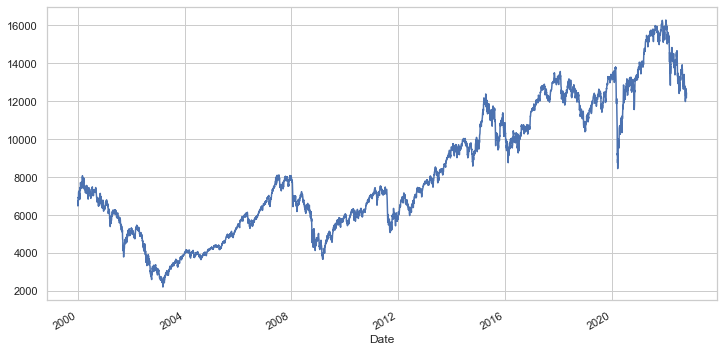

In [178]:
DAX['Close'].plot(figsize=(12, 6))

##### Simple Moving Average
\begin{equation*}
SMA: y_m =   \frac{a_{k} + a_{k-1} + ... + a_{k-(m-1)}}{m}
\end{equation*}

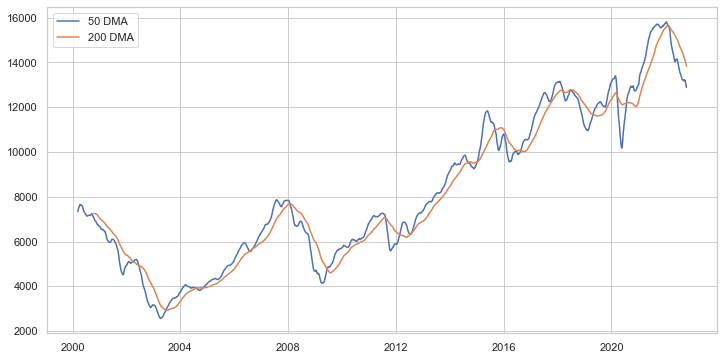

In [179]:
# Plot the moving average
year_range = DAX['Close'].index

plt.figure(figsize=(12,6)) 

#plt.plot(year_range, DAX['Close'], label="Original")
plt.plot(year_range, DAX['Close'].rolling(50).mean(), label="50 DMA")      #30 day moving average
plt.plot(year_range, DAX['Close'].rolling(200).mean(),label="200 DMA")     #100 day moving average
plt.legend()
plt.show()

#### 2. Expanding Window
<img src="expanding_window.jpg" alt="Drawing" style="width: 500px;"/>

In [180]:
# Expanding Mean
DAX['Close'].expanding(min_periods = 1).mean()[1:5]

Date
2000-01-04    6668.854980
2000-01-05    6613.259928
2000-01-06    6578.674927
2000-01-07    6619.131934
Name: Close, dtype: float64

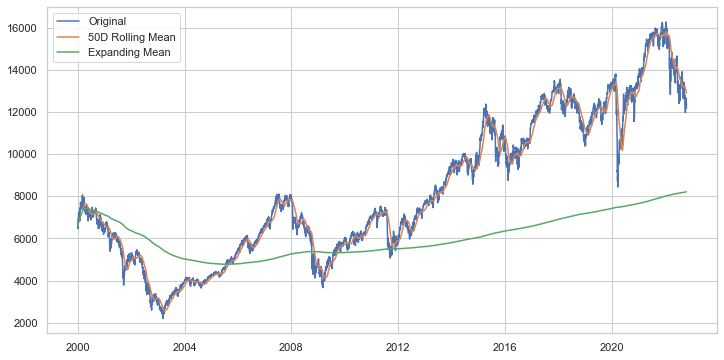

In [181]:
# Plot the moving average
year_range = DAX['Close'].index

plt.figure(figsize=(12,6)) 

plt.plot(year_range, DAX['Close'], label="Original")
plt.plot(year_range, DAX['Close'].rolling(50).mean(), label="50D Rolling Mean")      
plt.plot(year_range, DAX['Close'].expanding(min_periods = 1).mean(), label="Expanding Mean")      
plt.legend()
plt.show()

##### Exponential Moving Average

###### 1. Weighted Average method:
\begin{equation*}
EMA: y_k = \frac{a_{k} + (1-\alpha)a_{k-1} + (1-\alpha)^{2}a_{k-2}... + (1-\alpha)^{k}a_{0}}{1 + (1-\alpha) + (1-\alpha)^{2}+ ... + (1-\alpha)^{k}}  
\end{equation*}

##### 2. Recursive calculation:
$$
 y_0 = a_0
$$

$$
 y_k = (1-\alpha)y_{k-1} + \alpha a_k
$$

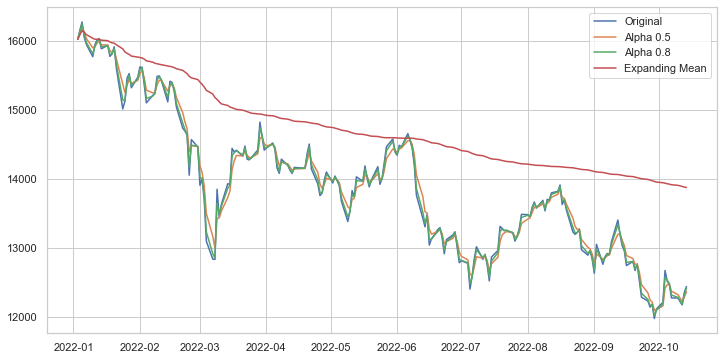

In [182]:
# Plot the exponential moving average
df = DAX['Close'].truncate(before="2022-01-01")
df.shape

year_range = df.index

plt.figure(figsize=(12,6)) 

plt.plot(year_range, df, label="Original")
plt.plot(year_range, df.ewm(alpha=0.5).mean(), label="Alpha 0.5")      #30 day moving average
plt.plot(year_range, df.ewm(alpha=0.8).mean(),label="Alpha 0.8")       #100 day moving average
plt.plot(year_range, df.expanding(min_periods = 1).mean(), label="Expanding Mean")      

plt.legend()
plt.show()

In [183]:
# Try with a more volatile dataset - Sunspots on annual basis
data_loader = sm.datasets.sunspots.load_pandas()
df = data_loader.data
df.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


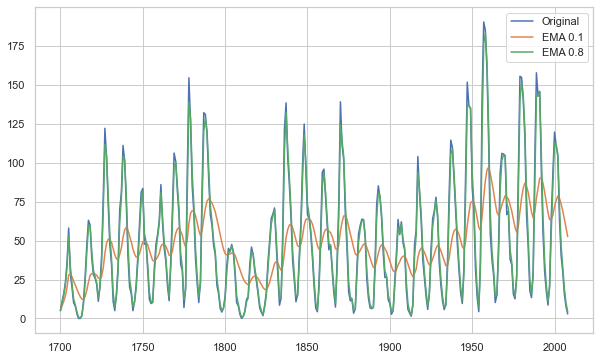

In [184]:
# Plot the exponential moving average
year_range = df["YEAR"].values

plt.figure(figsize=(10,6)) 

plt.plot(year_range, df["SUNACTIVITY"].values, label="Original")
plt.plot(year_range, df["SUNACTIVITY"].ewm(alpha=0.1).mean(), label="EMA 0.1")    #alpha = 0.1 - low decay
plt.plot(year_range, df["SUNACTIVITY"].ewm(alpha=0.8).mean(),label="EMA 0.8")     #alpha = 0.8 - high decay
plt.legend()
plt.show()

#### 3. Auto Correlation

<img src="autocorrelation.GIF" alt="Drawing" style="width: 250px;"/>

In [185]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

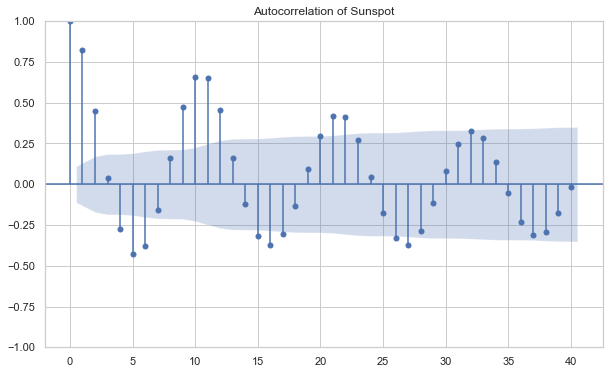

In [186]:
#ACF - plot of the correlation of a time series with its lag is called AutoCorrelation Function

fig, ax = plt.subplots(figsize=(10, 6))  #To make the chart a bit bigger

plot_acf(df["SUNACTIVITY"].values, lags=40, title='Autocorrelation of Sunspot', ax=ax)
plt.show()

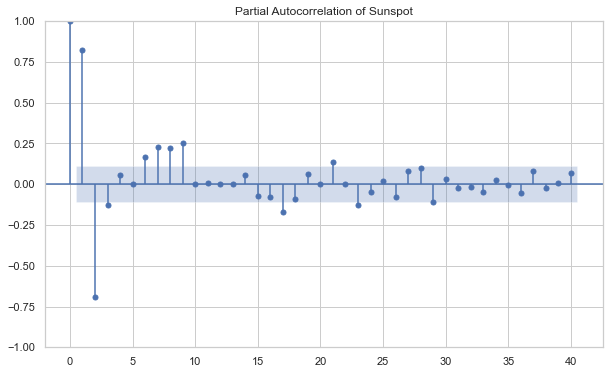

In [187]:
# The partial autocorrelation at lag k - the correlation after removing the effect of shorter lags correlation

fig, ax = plt.subplots(figsize=(10, 6))  #To make the chart a bit bigger

plot_pacf(df["SUNACTIVITY"].values, lags=40, method='ols', title='Partial Autocorrelation of Sunspot', ax=ax)
plt.show()

#### 4. Co-Integration

A cointegration test is used to establish if there is a correlation between several time series in the long term.

<img src="cointegration.jpg" alt="Drawing" style="width: 800px;"/>

In [188]:
import pandas_datareader as pdr               #for retreiving stock prices
import seaborn as sns

from statsmodels.tsa.stattools import coint 

In [189]:
# Have a list of tech stock tickers
tickers = ['msft', 'aapl', 'nvda', 'goog']
stockdata = pdr.get_data_yahoo(tickers)

<AxesSubplot:xlabel='Date'>

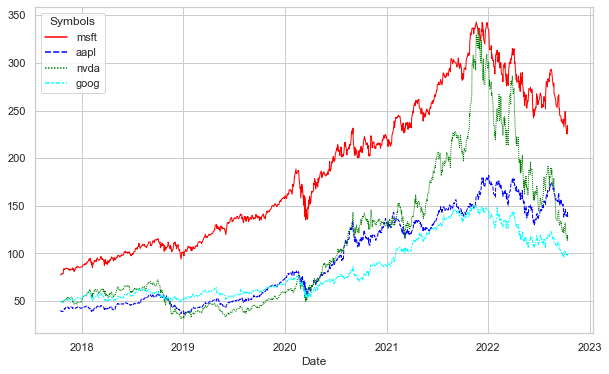

In [190]:
df = stockdata.Close
df.head()

sns.set(style="whitegrid", rc={'figure.figsize':(10,6)})          #increase the figure size
sns.lineplot(data=df, linewidth=1, palette=['red', 'blue', 'green', 'aqua'])

In [191]:
# Test for no-cointegration of a univariate equation.
# The null hypothesis is no cointegration. Variables df1 and df2 are assumed to be integrated of order 1, I(1).

coint_t, p_val, critical_val = coint(df['msft'], df['aapl'])
p_val     

0.3989047046091935

In [192]:
coint_t, p_val, critical_val = coint(df['msft'], df['nvda'])
p_val

0.5251899947423192

- Cointegration describes a long-term relationship between asset prices.
- Cointegration can be seen as a measure of similarity of assets in terms of risk exposure profiles.